In [9]:
from Bio import SeqIO
import sequence_preprocess
import matplotlib.pyplot as plt
import pandas as pd
import hwnas.cifar10net as cifar10net

In [10]:
path = "../dataset/16S_AMP.fasta"
k = 7

In [11]:
with open(path) as handle:
    seqIt =  SeqIO.parse(handle, "fasta")
    sequence = next(seqIt)
    while "N" in str(sequence.seq):
        print("Seq. contains N")
        sequence = next(seqIt)

sequence

SeqRecord(seq=Seq('TGGGGAATATTGGACAATGGGCGCAAGCCTGATCCAGCCATACCGCGTGTGTGA...CGC'), id='1_S003714807', name='1_S003714807', description='1_S003714807 Root;Bacteria;Proteobacteria;Gammaproteobacteria;Alteromonadales;Alteromonadaceae;Marinobacter', dbxrefs=[])

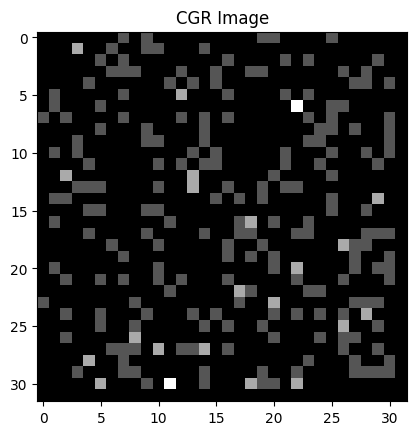

In [ ]:
from numpy import size


img = sequence_preprocess.cgr(str(sequence.seq))

plt.imshow(img, cmap='gray')
plt.title("CGR Image")
plt.show()

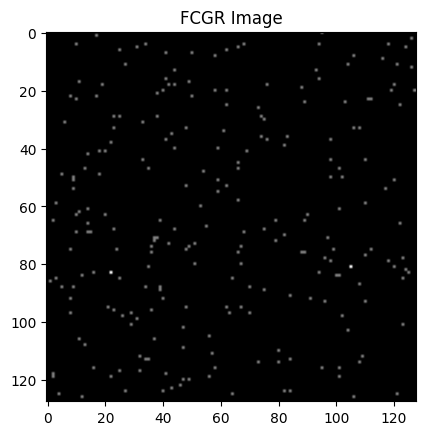

In [13]:
img = sequence_preprocess.fcgr(str(sequence.seq), k)
plt.imshow(img, cmap='gray')
plt.title("FCGR Image")
plt.show()

In [14]:
label_path ="../dataset/taxonomy.csv"
taxonomy_df = pd.read_csv(label_path, index_col=0)
taxonomy_df

,PHYLUM,CLASS,ORDER,FAMILY,GENUS
Sequence,,,,,
S003747738,Proteobacteria,Alphaproteobacteria,Rhodobacterales,Rhodobacteraceae,Rhodobaca
S000392825,Proteobacteria,Alphaproteobacteria,Rhodobacterales,Rhodobacteraceae,Rhodobaca
S003615628,Proteobacteria,Alphaproteobacteria,Rhodobacterales,Rhodobacteraceae,Rhodobaca
S004229513,Proteobacteria,Alphaproteobacteria,Rhodobacterales,Rhodobacteraceae,Rhodobaca
S001014626,Proteobacteria,Alphaproteobacteria,Rhodobacterales,Rhodobacteraceae,Rhodobaca
...,...,...,...,...,...
S004449133,Proteobacteria,Betaproteobacteria,Neisseriales,Neisseriaceae,Aquaspirillum
S003262754,Proteobacteria,Betaproteobacteria,Neisseriales,Neisseriaceae,Aquaspirillum
S000020486,Proteobacteria,Betaproteobacteria,Neisseriales,Neisseriaceae,Aquaspirillum


In [15]:
for col in taxonomy_df.columns:
    print(col, "has", taxonomy_df[col].nunique(), "distinct values.")

PHYLUM has 1 distinct values.
CLASS has 3 distinct values.
ORDER has 20 distinct values.
FAMILY has 39 distinct values.
GENUS has 100 distinct values.


In [16]:
# target = "Neisseriales"
classify_at_level = "GENUS"
label_dict={}
label_count = 0
# assert target in taxonomy_df[classify_at_level].values

df = pd.DataFrame()
with open(path) as handle:
    seqIt =  SeqIO.parse(handle, "fasta")
    while (sequence := next(seqIt, None)) is not None:
        genome_id = str(sequence.id).split("_")[1]
        key = str(taxonomy_df.loc[str(genome_id), classify_at_level]).strip()
        if (value := label_dict.get(key)) is None:
            value = label_count
            label_dict.update({key: value})
            label_count+=1
        entry = {
                "sequence" : [str(sequence.seq)],
                "label" : value,
                "genome_id" : genome_id
                #  "label" : [int(str(taxonomy_df.loc[str(sequence.id), classify_at_level]).strip() == target)]
                }
        row = pd.DataFrame.from_dict(entry)
        df = pd.concat([df, row], axis=0)
df

,sequence,label,genome_id
0,TGGGGAATATTGGACAATGGGCGCAAGCCTGATCCAGCCATACCGC...,0,S003714807
0,TGGGGAATTTTGGACAATGGGCGAAAGCCTGATCCAGCCATGCCGC...,1,S000412960
0,TGGGGAATATTGCGCAATGGGGGCAACCCTGACGCAGGCAAGCCGC...,2,S001872179
0,TGGGGAATTTTGGACAATGGGCGCAAGCCTGATCCAGCCATGCCGC...,3,S003709983
0,TGGGGAATCTTAGACAATGGGCGCAAGCCTGATCTAGCCATGCCGC...,4,S002410908
...,...,...,...
0,TGGGGAATTTTGGACAATGGGCGCAAGCCTGATCCAGCCATGCCGC...,77,S000403854
0,TGGGGAATATTGGACAATGGGCGCAAGCCTGATCCAGCCATGCCGC...,78,S000871539
0,TGGGGAATATTGCACAATGGGCGCAAGCCTGATGCAGCCATGCCGC...,7,S002442123
0,TGGGGAATATTGGACAATGGGGGCAACCCTGATCCAGCCATGCCGC...,72,S004482857


In [17]:
# cifar10net.df_to_fcgr(df,k)

In [18]:
group_sizes = df.groupby('genome_id').size()
(group_sizes.describe())

count    914.000000
mean      30.634573
std        5.852134
min       15.000000
25%       27.000000
50%       30.000000
75%       34.000000
max       49.000000
dtype: float64

In [19]:
group_class_counts = df.groupby(['genome_id', 'label']).size().unstack(fill_value=0)
print(group_class_counts.describe())

label          0           1           2           3           4           5   \
count  914.000000  914.000000  914.000000  914.000000  914.000000  914.000000   
mean     0.330416    0.371991    0.282276    0.322757    0.322757    0.340263   
std      3.337564    3.629851    2.865586    3.132312    3.123558    3.263053   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max     41.000000   45.000000   35.000000   43.000000   44.000000   38.000000   

label          6           7           8           9   ...          86  \
count  914.000000  914.000000  914.000000  914.000000  ...  914.000000   
mean     0.368709    0.342451    0.330416    0.376368  ...    0.310722   
std      3.548559    3.325004    3.213508    3.6

In [20]:
most_common_class_count = df['label'].value_counts().max()
total_samples = len(df)

baseline_accuracy = most_common_class_count / total_samples
print(f"Baseline Accuracy: {baseline_accuracy * 100:.4f}%")

Baseline Accuracy: 1.2286%


In [21]:
dataset = cifar10net.FCGRDataset(df, k)
loader = cifar10net.DataLoader(dataset, batch_size=32, shuffle=True)

In [22]:
model = cifar10net.CIFAR10NetFCGR(df.label.nunique(), k).to(device="cuda")

In [23]:
# cifar10net.train(model, loader)

In [24]:
cifar10net.gkf_grouped(df, "genome_id", k, max_epochs=50, batch_size = 128) # type: ignore

Torch device cuda
Fold 1
Epoch 1/50, Val Accuracy: 68.70%, Precision: 0.76, Recall: 0.69, F1: 0.67
Reset Patience
Epoch 2/50, Val Accuracy: 76.08%, Precision: 0.80, Recall: 0.76, F1: 0.75
Reset Patience
Epoch 3/50, Val Accuracy: 76.28%, Precision: 0.80, Recall: 0.76, F1: 0.76
Reset Patience
Epoch 4/50, Val Accuracy: 76.53%, Precision: 0.80, Recall: 0.77, F1: 0.76
Reset Patience
Epoch 5/50, Val Accuracy: 77.78%, Precision: 0.81, Recall: 0.78, F1: 0.78
Reset Patience
Epoch 6/50, Val Accuracy: 74.98%, Precision: 0.81, Recall: 0.75, F1: 0.75
Epoch 7/50, Val Accuracy: 77.78%, Precision: 0.81, Recall: 0.78, F1: 0.77
Epoch 8/50, Val Accuracy: 76.91%, Precision: 0.80, Recall: 0.77, F1: 0.76
Epoch 9/50, Val Accuracy: 74.66%, Precision: 0.81, Recall: 0.75, F1: 0.75
Epoch 10/50, Val Accuracy: 75.98%, Precision: 0.80, Recall: 0.76, F1: 0.76
Epoch 11/50, Val Accuracy: 77.69%, Precision: 0.80, Recall: 0.78, F1: 0.77
Epoch 12/50, Val Accuracy: 77.49%, Precision: 0.80, Recall: 0.77, F1: 0.77
Epoch 13/

KeyboardInterrupt: 